# CLClim0NE: Visualize the results of the CLClim0NE protein outputs compared to those in the original model

In [6]:
import pickle
import os
import pandas as pd
from matplotlib import pyplot as plt
os.chdir(os.path.expanduser('~/wcEcoli/out/'))
# noinspection PyUnresolvedReferences
import numpy as np
import plotly.graph_objects as go
from models.ecoli.analysis import cohortAnalysisPlot
from wholecell.analysis.analysis_tools import (exportFigure,
	read_bulk_molecule_counts, read_stacked_bulk_molecules, read_stacked_columns)
from wholecell.io.tablereader import TableReader
from sklearn.metrics import r2_score

# Load in the simulation data for the original model (CLNE) and the CLClim2NE model

In [7]:
# CLNE # todo explain how I got this data from running a sim and runing the cohort save data file 

VS_log_CLNE = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/previous_models/CLNE_files/cohort_saved_protein_count_data_10_09/validation_data/log_data/Log10_Schmidt_Comparison_startGen_2.csv')
VW_log_CLNE = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/previous_models/CLNE_files/cohort_saved_protein_count_data_10_09/validation_data/log_data/Log10_Wisniewski_Comparison_startGen_2.csv')

# CLClimNE
VS_log_CLClimNE = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim2/cohort_saved_protein_count_data/validation_data/log_data/Log10_Schmidt_Comparison_startGen_2.csv')
VW_log_CLClimNE = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim2/cohort_saved_protein_count_data/validation_data/log_data/Log10_Wisniewski_Comparison_startGen_2.csv')

In [8]:
# specifiy the current sequence being used: 
current_sequence = 'CLClim2NE'
Clim_name = 'Clim2'

# Schmidt Validation Data Comparisons


Plot #1: Compare the Schmidt Validation Protein Counts for the CLNE and CLClim0NE models

In [9]:
VS_log_CLClimNE

Monomer ID  Log10 Simulated Schmidt Counts   
0               PNUC-MONOMER[i]                        2.536041  \
1         FERREDOXIN-MONOMER[c]                        3.025655   
2            EG10596-MONOMER[c]                        2.691883   
3     MALTACETYLTRAN-MONOMER[c]                        1.966193   
4      SPERMIDINESYN-MONOMER[c]                        3.329290   
...                         ...                             ...   
2136           G6140-MONOMER[c]                        0.844517   
2137             GSP-MONOMER[c]                        2.697205   
2138         ASNSYNB-MONOMER[c]                        2.771738   
2139         EG11179-MONOMER[c]                        3.024766   
2140           G6611-MONOMER[c]                        2.442843   

      Log10 Validation Schmidt Counts  
0                            1.785330  
1                            3.438226  
2                            2.235528  
3                            1.838849  
4                            3.017451  
...                               ...  
2136                         1.633468  
2137                         2.267172  
2138                         3.062582  
2139                         2.785330  
2140                         0.698970  

[2141 rows x 3 columns]

In [10]:
# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["Monomer ID"]

    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=name))

    # Compute trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trendline_y = p(x)

    # Add trendline trace
    fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, VS_log_CLNE, 'CLNE vs Schmidt')
add_scatter_and_trendline(fig, VS_log_CLClimNE, (current_sequence +' vs Schmidt'))

# Update layout
fig.update_traces(marker_size=3)
fig.update_layout(
    title=f"Schmidt Validation Protein Counts vs CLNE and {current_sequence}",
    xaxis_title="log10(Schmidt Validation Protein Counts)",
    yaxis_title=f"log10(CLNE, {current_sequence})",
    autosize=False,
    width=900,
    height=600
)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
# Show figure
fig.show()

Plot #1.a: Compare the Schmidt Validation Protein Counts for the CLNE and CLClim0NE models but with seaborn.

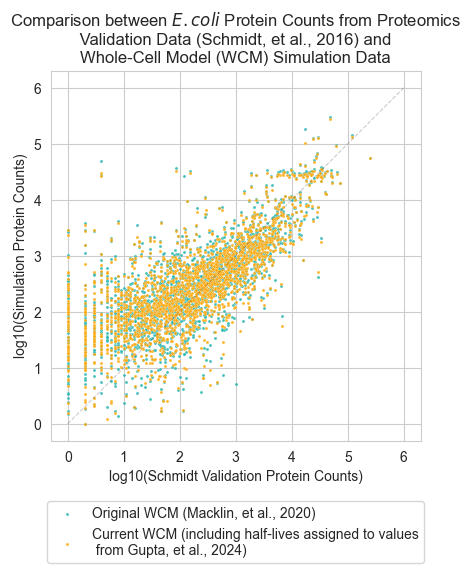

In [11]:
import seaborn as sns

# TODO: ask nora if this should be normalized by the total protein counts in the validation data? the way I did for cyrus's data?

# Plot the data:
sns.scatterplot(x="Log10 Validation Schmidt Counts", y="Log10 Simulated Schmidt Counts", data=VS_log_CLNE, s=5, color='lightseagreen', alpha=.8)
sns.scatterplot(x="Log10 Validation Schmidt Counts", y="Log10 Simulated Schmidt Counts", data=VS_log_CLClimNE, s=5, color="orange", alpha=.8)

# find the max value of the plot for making a y=x line: 
max_vals = [max(VS_log_CLNE["Log10 Validation Schmidt Counts"]), max(VS_log_CLNE["Log10 Simulated Schmidt Counts"])]; max_val = round(max(max_vals))
yxvals = range(0, max_val + 2) 
plt.plot(yxvals, yxvals, linewidth=.8, linestyle="dashed", color="black", alpha=.2); 

# plot specs
plt.xlabel("log10(Schmidt Validation Protein Counts)")
plt.ylabel(f"log10(Simulation Protein Counts)")
plt.axis('square')
plt.title("Comparison between $\t{E. coli}$ Protein Counts from Proteomics \n Validation Data (Schmidt, et al., 2016) and \nWhole-Cell Model (WCM) Simulation Data")
plt.legend(["Original WCM (Macklin, et al., 2020)", "Current WCM (including half-lives assigned to values\n from Gupta, et al., 2024)",], bbox_to_anchor=(.5, -.35), loc='lower center')

This is the same plot as above, but I normalized one set to the other. Not sure that it changed anything though.

Plot #2: Compare the Schmidt Validation Protein Counts for the CLNE and CLClim0NE models (but filter values below log10(2))

In [12]:
# Plot the simulation protein counts against the validation counts, filtering out proteins with counts below log10(2) (these are likely to be subgenerational proteins) 
def add_scatter_and_trendline(fig, df, name):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["Monomer ID"]

    # Add scatter 
    fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=name))

    # Compute trendline for data 
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trendline_y = p(x)

    # Add trendline 
    fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# filter out any counts below log10(2):
VS_log_CLNE_filtered = VS_log_CLNE[(VS_log_CLNE["Log10 Validation Schmidt Counts"] > 2) & (VS_log_CLNE["Log10 Simulated Schmidt Counts"] > 2)]
VS_log_CLClimNE_filtered = VS_log_CLClimNE[(VS_log_CLClimNE["Log10 Validation Schmidt Counts"] > 2) & (VS_log_CLClimNE["Log10 Simulated Schmidt Counts"] > 2)]

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, VS_log_CLNE_filtered, 'CLNE vs Schmidt')
add_scatter_and_trendline(fig, VS_log_CLClimNE_filtered, (current_sequence +' vs Schmidt'))

# Update layout
fig.update_traces(marker_size=3)
fig.update_layout(
    title=f"Schmidt Validation Protein Counts vs CLNE and {current_sequence} (filtered for counts > log10(2))",
    xaxis_title="log10(Schmidt Validation Protein Counts)",
    yaxis_title=f"log10(CLNE, {current_sequence})",
    autosize=False,
    width=900,
    height=600
)

# add a y=x line
fig.add_trace(go.Scatter(x=[2, 6], y=[2, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
# Show figure
fig.show()

# Wisniewski Validation Data Comparisons

Plot #3: Compare the Wisniewski Validation Protein Counts for the CLNE and CLClim0NE models

In [13]:
# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name):
    x = df["Log10 Validation Wisniewski Counts"]
    y = df["Log10 Simulated Wisniewski Counts"]
    hovertext = df["Monomer ID"]

    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=name))

    # Compute trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trendline_y = p(x)

    # Add trendline trace
    fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, VW_log_CLNE, 'CLNE vs Wisniewski')
add_scatter_and_trendline(fig, VW_log_CLClimNE, (current_sequence +' vs Wisniewski'))

# Update layout
fig.update_traces(marker_size=3)
fig.update_layout(
    title=f"Wisniewski Validation Protein Counts vs CLNE and {current_sequence}",
    xaxis_title="log10(Wisniewski Validation Protein Counts)",
    yaxis_title=f"log10(CLNE, {current_sequence})",
    autosize=False,
    width=900,
    height=600
)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
# Show figure
fig.show()

Plot #4: Compare the Wisniewski Validation Protein Counts for the CLNE and CLClim0NE models (but filter values below log10(2))

In [14]:
# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name):
    x = df["Log10 Validation Wisniewski Counts"]
    y = df["Log10 Simulated Wisniewski Counts"]
    hovertext = df["Monomer ID"]

    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=name))

    # Compute trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    trendline_y = p(x)

    # Add trendline trace
    fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
# filter out any counts below log10(2):
VW_log_CLNE = VW_log_CLNE[(VW_log_CLNE["Log10 Validation Wisniewski Counts"] > 2) & (VW_log_CLNE["Log10 Simulated Wisniewski Counts"] > 2)]
VW_log_CLClimNE = VW_log_CLClimNE[(VW_log_CLClimNE["Log10 Validation Wisniewski Counts"] > 2) & (VW_log_CLClimNE["Log10 Simulated Wisniewski Counts"] > 2)]
add_scatter_and_trendline(fig, VW_log_CLNE, 'CLNE vs Wisniewski')
add_scatter_and_trendline(fig, VW_log_CLClimNE, (current_sequence +' vs Wisniewski'))

# Update layout
fig.update_traces(marker_size=3)
fig.update_layout(
    title=f"Wisniewski Validation Protein Counts vs CLNE and {current_sequence}",
    xaxis_title="log10(Wisniewski Validation Protein Counts)",
    yaxis_title=f"log10(CLNE, {current_sequence})",
    autosize=False,
    width=900,
    height=600
)

# add a y=x line
fig.add_trace(go.Scatter(x=[2, 6], y=[2, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
# Show figure
fig.show()

# Plot of the proteases in the CLClimNE model

In [15]:
# FUNCTIONS

# get the gene IDs for each monomer IDs:
def get_gene_ids_for_monomer_ids():
    # code adapted from convert_to_flat.py
    import io
    from wholecell.io import tsv
    from wholecell.utils.filepath import ROOT_PATH
    RNAS_FILE = os.path.join(ROOT_PATH, 'reconstruction', 'ecoli', 'flat', 'rnas.tsv')
    with io.open(RNAS_FILE, 'rb') as f:
        reader = tsv.reader(f, delimiter='\t')
        headers = next(reader)
        while headers[0].startswith('#'):
            headers = next(reader)

        gene_id_index = headers.index('gene_id')
        protein_id_index = headers.index('monomer_ids')
        monomer_ids_to_gene_ids = {}
        for line in reader:
            gene_id = line[gene_id_index]
            protein_id = list(line[protein_id_index][2:-2].split('", "'))[0]
            monomer_ids_to_gene_ids[protein_id] = gene_id

        return monomer_ids_to_gene_ids
    
def get_gene_symbols_for_monomer_ids():
    # code adapted from convert_to_flat.py
    import io
    from wholecell.io import tsv
    from wholecell.utils.filepath import ROOT_PATH
    RNAS_FILE = os.path.join(ROOT_PATH, 'reconstruction', 'ecoli', 'flat', 'rnas.tsv')
    with io.open(RNAS_FILE, 'rb') as f:
        reader = tsv.reader(f, delimiter='\t')
        headers = next(reader)
        while headers[0].startswith('#'):
            headers = next(reader)

        gene_symbol_index = headers.index('common_name')
        protein_id_index = headers.index('monomer_ids')
        monomer_ids_to_gene_symbols = {}
        for line in reader:
            gene_symbol = line[gene_symbol_index]
            protein_id = list(line[protein_id_index][2:-2].split('", "'))[0]
            monomer_ids_to_gene_symbols[protein_id] = gene_symbol

        return monomer_ids_to_gene_symbols
    
    
# convert gene IDs to monomer IDs:
def get_monomer_ids_for_gene_ids():
    # code adapted from convert_to_flat.py
    import io
    from wholecell.io import tsv
    from wholecell.utils.filepath import ROOT_PATH
    RNAS_FILE = os.path.join(ROOT_PATH, 'reconstruction', 'ecoli', 'flat', 'rnas.tsv')
    with io.open(RNAS_FILE, 'rb') as f:
        reader = tsv.reader(f, delimiter='\t')
        headers = next(reader)
        while headers[0].startswith('#'):
            headers = next(reader)

        gene_id_index = headers.index('gene_id')
        protein_id_index = headers.index('monomer_ids')
        gene_ids_to_monomer_ids = {}
        for line in reader:
            gene_id = line[gene_id_index]
            protein_id = list(line[protein_id_index][2:-2].split('", "'))[0]
            gene_ids_to_monomer_ids[gene_id] = protein_id

        return gene_ids_to_monomer_ids
    
    
# recall the genes defined as "essential" in the model, and return them as a list of gene names:
def get_essential_genes():
    # code adapted from convert_to_flat.py
    import io
    from wholecell.io import tsv
    from wholecell.utils.filepath import ROOT_PATH
    GENES_FILE = os.path.join(ROOT_PATH, 'validation', 'ecoli', 'flat', 'essential_genes.tsv')
    with io.open(GENES_FILE, 'rb') as f:
        reader = tsv.reader(f, delimiter='\t')
        headers = next(reader)
        while headers[0].startswith('#'):
            headers = next(reader)

        gene_id_index = headers.index('FrameID')
        essential_genes = []
        for line in reader:
            essential_gene = line[gene_id_index]
            essential_genes.append(essential_gene)

        return essential_genes
	
	
# convert the data from the ParCa translation.py raw HL saves: 
def convert_HL_data(dataframe):
    name_s = 'rate constant (s^1)' # name in seconds
    name_m = 'half life (min)' # name in mins
    dataframe.rename(columns={'Rate Constant': name_s}, inplace=True)
    dataframe[name_m] = dataframe[name_s] * 60 * (1/np.log(2))
    dataframe[name_m] = 1 / dataframe[name_m] # units of mins
    return dataframe


# convert each data source in the saved HL data file folders 
def convert_data_and_add_HL_source(dataframe, HL_source):
    name_s = HL_source + ' rate constant (s^1)' # name in seconds
    name_m = HL_source + ' half life (min)' # name in mins
    dataframe.rename(columns={'Rate Constant': name_s}, inplace=True)
    dataframe[name_m] = dataframe[name_s] * 60 * (1/np.log(2))
    dataframe[name_m] = 1 / dataframe[name_m] # units of mins
    return dataframe
    


In [16]:
# load in the protease-substrate assignment datatable: 
protease_data = pd.read_excel('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/Gupta_et_al_2024_ST2_protease_assignment_data.xlsx')

# determine if any of the proteins assigned to a protease are considered an essential gene in the model: 
essential_substrate_gene_symbols = []
for gene in get_essential_genes():
    if get_gene_symbols_for_monomer_ids()[get_monomer_ids_for_gene_ids()[gene]] in protease_data['Gene name'].values:
        essential_substrate_gene_symbols.append(get_gene_symbols_for_monomer_ids()[get_monomer_ids_for_gene_ids()[gene]])
        
print("There are " + str(len(protease_data['Gene name'].values)) + " proteins assigned to a protease in the Gupta et al., 2024 data.")
print("Essential Genes in Model that are Assigned to a Protease (" +str(len(essential_substrate_gene_symbols))+"): ", essential_substrate_gene_symbols)

There are 308 proteins assigned to a protease in the Gupta et al., 2024 data.
Essential Genes in Model that are Assigned to a Protease (57):  ['bioB', 'ilvE', 'argA', 'aroE', 'cysH', 'cysI', 'cysJ', 'cysN', 'leuA', 'leuC', 'leuD', 'lysA', 'thrA', 'trpB', 'tyrA', 'iscS', 'nadA', 'nadB', 'metR', 'ispH', 'ftsI', 'ftsQ', 'ftsZ', 'lpxC', 'erpA', 'frr', 'dxr', 'ispU', 'dnaE', 'thiL', 'dnaX', 'ftsK', 'rpsA', 'mukB', 'acpP', 'minE', 'hemA', 'folE', 'ligA', 'dapA', 'ispG', 'era', 'ffh', 'metK', 'parE', 'ribB', 'obgE', 'def', 'rplX', 'dnaA', 'birA', 'rpoB', 'rpoC', 'ubiA', 'lexA', 'dnaB', 'dnaC']


In [17]:
# determine which monomer IDs are protein substrates of the proteases in the CLClim0NE model:
monomer_ids = VS_log_CLClimNE['Monomer ID']
monomer_ids = monomer_ids.str.slice(0, -3)

CLClim0NE_protease_substrate_gene_symbols = []
CLClim0NE_protease_substrate_monomer_ids = []
for monomer_id in monomer_ids:
	monomer = monomer_id
	gene_symbol = get_gene_symbols_for_monomer_ids()[monomer]
	if gene_symbol in protease_data['Gene name'].values:
		CLClim0NE_protease_substrate_gene_symbols.append(gene_symbol)
		CLClim0NE_protease_substrate_monomer_ids.append(monomer)
        
print("Total Protease Substrates in VS CLClimNE (" +str(len(CLClim0NE_protease_substrate_gene_symbols))+"): ", CLClim0NE_protease_substrate_gene_symbols)

VS_log_CLClimNE['gene symbol'] = VS_log_CLClimNE['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]]) # this is to add to the hovertext
# if a monomer in CLClim0NE_protease_substrate_gene_symbols is found in monomer_ids, remove them from Clim0_data and add it to a new dataframe: 
CLClim0NE_protease_substrate_idxs = monomer_ids.isin(CLClim0NE_protease_substrate_monomer_ids)
CLClim0NE_protease_substrates = VS_log_CLClimNE[CLClim0NE_protease_substrate_idxs].copy()
CLClim0NE_protease_substrates['HL Source'] = f"{current_sequence} (protease substrate)"
CLClim0NE_VS_log_data_remaining = VS_log_CLClimNE[~CLClim0NE_protease_substrate_idxs].copy()
# Not all the proteases match to model proteins here becuase the Schmidt data has less proteins overall! so thtat is why the numbers are different.

Total Protease Substrates in VS CLClimNE (236):  ['hemA', 'hsdM', 'dnaA', 'zntA', 'avtA', 'alaA', 'nanR', 'bisC', 'folE', 'ahpF', 'otsA', 'dps', 'ycgB', 'uvrD', 'yegW', 'ypfH', 'tatB', 'intF', 'gdhA', 'parE', 'sdaA', 'aroE', 'folX', 'ybjI', 'cfa', 'fklB', 'aroG', 'dnaX', 'yiiQ', 'epmB', 'ispH', 'lldD', 'ybcJ', 'dadA', 'csdA', 'srmB', 'ybhA', 'iscR', 'cysJ', 'fadE', 'nadB', 'mukB', 'cysN', 'iscA', 'ilvB', 'mazG', 'recF', 'rsuA', 'selD', 'phnO', 'putA', 'yaaA', 'ftsI', 'yjjU', 'ydcF', 'yihD', 'fnr', 'hmp', 'oxyR', 'aroL', 'ydcI', 'lysA', 'proQ', 'asnA', 'mutS', 'leuA', 'yibA', 'znuC', 'ydfZ', 'ftsK', 'guaD', 'secG', 'rpoS', 'metR', 'greB', 'helD', 'ligA', 'sbcC', 'trxC', 'iscU', 'dnaE', 'frr', 'lexA', 'fbp', 'rlmD', 'aroD', 'bioB', 'yjgA', 'mioC', 'rnk', 'cycA', 'priC', 'yheS', 'amiB', 'metK', 'gsiA', 'trxB', 'nudL', 'aceA', 'nemA', 'cobT', 'hemE', 'erpA', 'ybeZ', 'ycaR', 'sufB', 'dapA', 'dxr', 'chbB', 'rarA', 'yfaY', 'gabT', 'clpA', 'elaA', 'nadA', 'ydbK', 'rlmN', 'topB', 'aroK', 'rng',

In [18]:
import numpy as np
import plotly.graph_objs as go

# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name, is_protease_substrate=False):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["gene symbol"]
	
    # Properly indented if statement
    if is_protease_substrate == True:
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', 
                                  marker_size=7, marker=dict(color="orange", symbol='star'), 
                                  name=name))
    else: 
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker_size=4,
                                 marker=dict(color="lightseagreen"),  name=name))
		
        # Compute trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        trendline_y = p(x)
    
        # Add trendline trace
        fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', line=dict(color="salmon"), name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, CLClim0NE_VS_log_data_remaining, (current_sequence + ' vs Schmidt'))
add_scatter_and_trendline(fig, CLClim0NE_protease_substrates, (current_sequence + '(protease substrates) vs Schmidt'), True)

# Update layout
fig.update_layout(
    title=f"Schmidt Validation Protein Counts vs {current_sequence}",
    xaxis_title="log10(Schmidt Validation Protein Counts)",
    yaxis_title=f"log10({current_sequence})",
    autosize=False,
    width=1200,
    height=1000
)

# Add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=dict(color="black", dash="dash"), opacity=0.2,
        name="y=x"))

# Show figure
fig.show()


In [19]:
import numpy as np
import plotly.graph_objs as go

# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline_proposal(fig, df, name, is_protease_substrate=False):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["gene symbol"]
	
    # Properly indented if statement
    if is_protease_substrate == True:
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', 
                                  marker_size=7, marker=dict(color="orange", symbol='star'), 
                                  name=name))
    else: 
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker_size=4,
                                 marker=dict(color="lightseagreen", opacity=.5),  name=name))
		
        # Compute trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        trendline_y = p(x)
    
        # Add trendline trace
        fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', line=dict(color="salmon"), name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline_proposal(fig, CLClim0NE_VS_log_data_remaining, (current_sequence + ' vs Schmidt'))
add_scatter_and_trendline_proposal(fig, CLClim0NE_protease_substrates, (current_sequence + '(protease substrates) vs Schmidt'), True)

# Update layout
fig.update_layout(
    title=f"WCM Protein Counts (incorperating HLs from Gupta, et al., 2024) <br>vs Validation Protein Counts (Schmidt, et al., 2016)",
    xaxis_title="log10(Schmidt Validation Protein Counts)",
    yaxis_title=f"log10(WCM incorperating Clim HLs Protein Counts)",
    autosize=False,
    width=1000,
    height=700
)

# Add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=dict(color="black", dash="dash"), opacity=0.2,
        name="y=x"))

# Show figure
fig.show()


## Make the above plot but with essential genes as the stars instead

In [20]:
# determine the essential genes in VS CLClimNE
VS_log_CLClimNE['gene symbol'] = VS_log_CLClimNE['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]]) 
gene_ids = VS_log_CLClimNE['gene symbol']
        
CLClim0NE_essential_gene_symbols = []
CLClim0NE_essential_gene_monomer_ids = []
for gene in get_essential_genes():
    gene_symbol = get_gene_symbols_for_monomer_ids()[get_monomer_ids_for_gene_ids()[gene]]
    if gene_symbol in VS_log_CLClimNE['gene symbol'].values:
        CLClim0NE_essential_gene_symbols.append(gene_symbol)
        CLClim0NE_essential_gene_monomer_ids.append(get_monomer_ids_for_gene_ids()[gene])
        
print("Total Essential Genes in VS CLClimNE (" +str(len(CLClim0NE_essential_gene_symbols))+"): ", CLClim0NE_essential_gene_symbols)

Total Essential Genes in VS CLClimNE (345):  ['argG', 'bioA', 'bioB', 'bioC', 'bioD', 'bioF', 'bioH', 'ilvE', 'cysG', 'ubiE', 'exoX', 'hflD', 'argA', 'argE', 'argH', 'aroA', 'aroB', 'aroC', 'aroE', 'cysC', 'cysE', 'cysH', 'cysI', 'cysJ', 'cysN', 'hisA', 'hisB', 'hisC', 'hisD', 'hisF', 'hisG', 'hisH', 'hisI', 'ilvA', 'ilvC', 'ilvD', 'leuA', 'leuB', 'leuC', 'leuD', 'lysA', 'metA', 'metB', 'metC', 'metF', 'metL', 'pabA', 'pabB', 'pheA', 'proA', 'proB', 'proC', 'serA', 'serB', 'serC', 'thrA', 'thrB', 'thrC', 'trpA', 'trpB', 'trpC', 'trpE', 'tyrA', 'carA', 'carB', 'guaA', 'guaB', 'purD', 'purE', 'purF', 'purH', 'purK', 'purL', 'purM', 'pyrB', 'pyrC', 'pyrD', 'pyrE', 'pyrF', 'thyA', 'iscS', 'nadA', 'nadB', 'nadC', 'panC', 'panD', 'pdxA', 'pdxB', 'pdxH', 'pdxJ', 'cysB', 'metR', 'ptsI', 'atpB', 'atpC', 'gltA', 'icd', 'ppc', 'panZ', 'ribF', 'ispH', 'dapB', 'folA', 'lptD', 'ftsL', 'ftsI', 'murE', 'murF', 'mraY', 'murD', 'murG', 'murC', 'ftsA', 'ftsZ', 'lpxC', 'secA', 'can', 'folK', 'hemL', 'erpA

In [21]:

# if a monomer in CLClim0NE_essential_gene_monomer_ids is found in monomer_ids, remove them from Clim0_data and add it to a new dataframe: 
CLClim0NE_EG_idxs = monomer_ids.isin(CLClim0NE_essential_gene_monomer_ids)
CLClim0NE_EGs = VS_log_CLClimNE[CLClim0NE_EG_idxs].copy()
CLClim0NE_EGs['HL Source'] = f"{current_sequence} (essential gene)"
CLClim0NE_VS_log_data_remaining = VS_log_CLClimNE[~CLClim0NE_EG_idxs].copy()

In [22]:
import numpy as np
import plotly.graph_objs as go

# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline_EGs(fig, df, name, is_protease_substrate=False):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["gene symbol"]
	
    # Properly indented if statement
    if is_protease_substrate == True:
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', 
                                  marker_size=7, marker=dict(color="orange", symbol='star'), 
                                  name=name))
    else: 
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker_size=4,
                                 marker=dict(color="lightseagreen", opacity=.5),  name=name))
		
        # Compute trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        trendline_y = p(x)
    
        # Add trendline trace
        fig.add_trace(go.Scatter(x=x, y=trendline_y, mode='lines', line=dict(color="salmon"), name=f'{name} Trendline: {p}'))

# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline_EGs(fig, CLClim0NE_VS_log_data_remaining, (current_sequence + ' vs Schmidt'))
add_scatter_and_trendline_EGs(fig, CLClim0NE_EGs, (current_sequence + '(essential genes) vs Schmidt'), True)

# Update layout
fig.update_layout(
    title=f"WCM Protein Counts (incorperating HLs from Gupta, et al., 2024) <br>vs Validation Protein Counts (Schmidt, et al., 2016)",
    xaxis_title="log10(Schmidt Validation Protein Counts)",
    yaxis_title=f"log10(WCM incorperating Clim HLs Protein Counts)",
    autosize=False,
    width=1000,
    height=700
)

# Add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=dict(color="black", dash="dash"), opacity=0.2,
        name="y=x"))

# Show figure
fig.show()


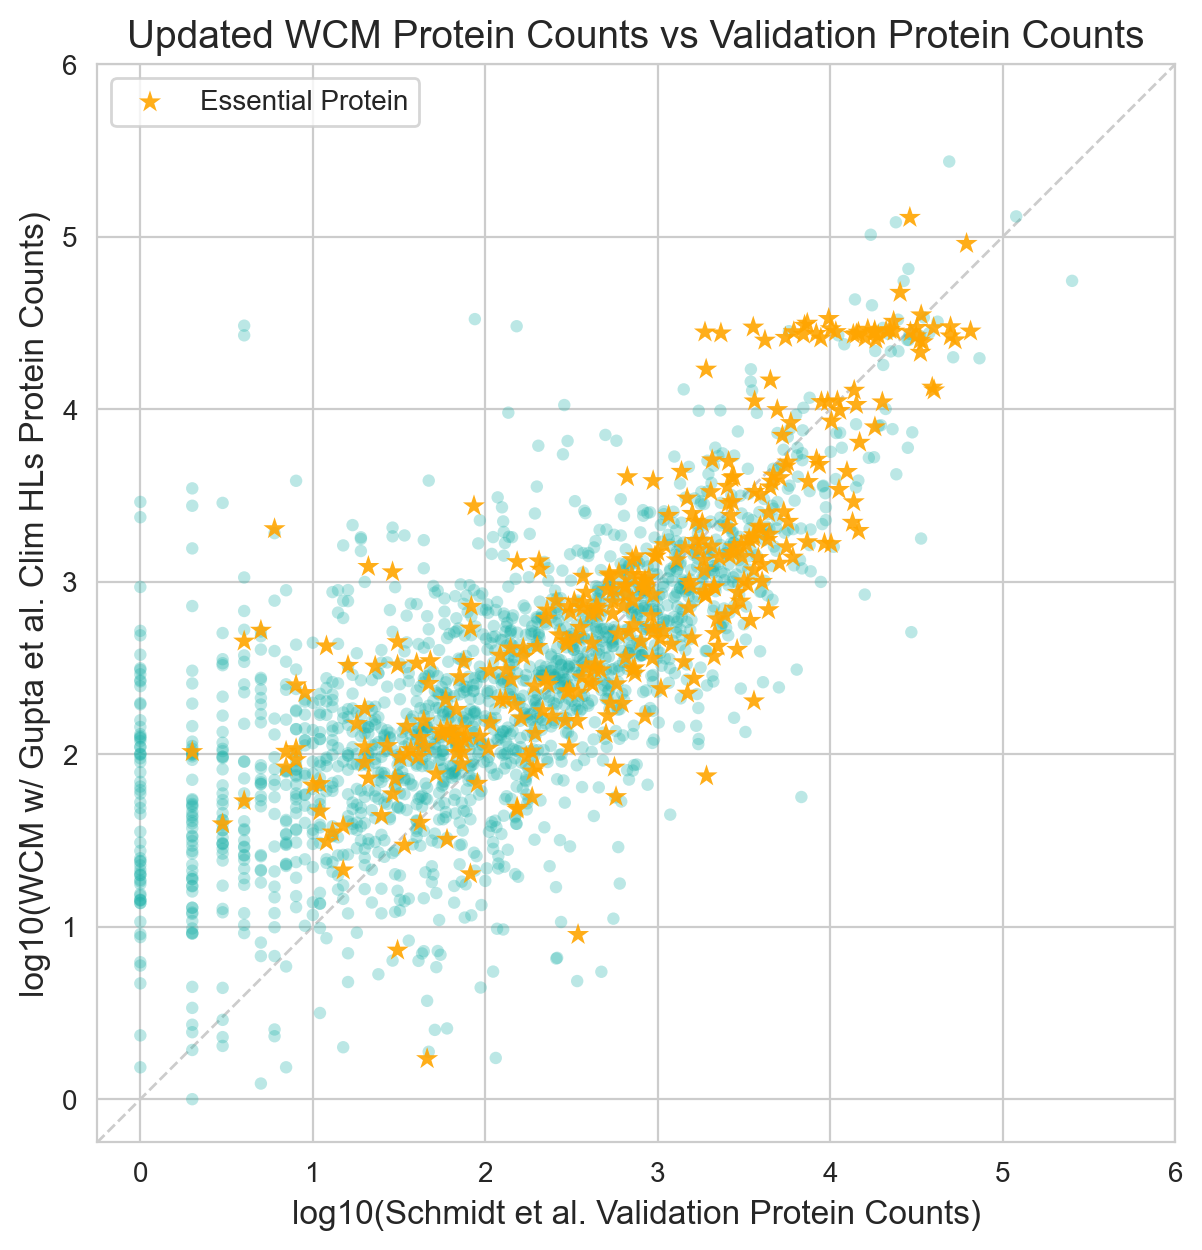

In [23]:
# do the matplotlib version of the above plot: 
import matplotlib.pyplot as plt
import numpy as np

# Function to create scatter plot and add trendline for Matplotlib
def add_scatter_and_trendline_EGs(ax, df, name, is_protease_substrate=False):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["gene symbol"]  # Note: Matplotlib doesn't support hover text

    if is_protease_substrate:
        ax.scatter(x, y, color="orange", s=70, marker='*', label=f'Essential Protein', edgecolor='none', alpha=.9, zorder=2)
    else:
        ax.scatter(x, y, color="lightseagreen", edgecolor='none', s=20, alpha=0.3, zorder=1)
        
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7), dpi=200)

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline_EGs(ax, CLClim0NE_VS_log_data_remaining, f'{current_sequence} vs Schmidt')
add_scatter_and_trendline_EGs(ax, CLClim0NE_EGs, f'{current_sequence} (essential genes) vs Schmidt', True)

# Add y=x reference line
ax.plot([-.250, 6], [-.250, 6], color="black", linestyle="--", linewidth=1, alpha=0.2,  zorder=0)

# Add title and axis labels
ax.set_title("Updated WCM Protein Counts vs Validation Protein Counts", fontsize=14)
ax.set_xlabel("log10(Schmidt et al. Validation Protein Counts)", fontsize=12)
ax.set_ylabel("log10(WCM w/ Gupta et al. Clim HLs Protein Counts)", fontsize=12)
ax.set_xlim(-.250, 6)
ax.set_ylim(-.250, 6)
# make the axes square
ax.set_aspect('equal', adjustable='box')

# Add legend
ax.legend()

# Show plot
plt.show()


# determine the R squared value 

In [24]:
from sklearn.metrics import r2_score

# reconnect the data: 
CLClim0NE_together = pd.concat([CLClim0NE_VS_log_data_remaining, CLClim0NE_EGs])

# rsquared = r2_score( true, predicted)
r_squared = r2_score(CLClim0NE_together["Log10 Validation Schmidt Counts"], CLClim0NE_together["Log10 Simulated Schmidt Counts"])
r_squared


0.47386956254184354

In [25]:
CLClim0NE_together

Monomer ID  Log10 Simulated Schmidt Counts   
0               PNUC-MONOMER[i]                        2.536041  \
1         FERREDOXIN-MONOMER[c]                        3.025655   
2            EG10596-MONOMER[c]                        2.691883   
3     MALTACETYLTRAN-MONOMER[c]                        1.966193   
4      SPERMIDINESYN-MONOMER[c]                        3.329290   
...                         ...                             ...   
2096         EG10613-MONOMER[m]                        1.691496   
2101         EG11440-MONOMER[c]                        3.025380   
2103           G7656-MONOMER[c]                        2.405959   
2113         EG11372-MONOMER[c]                        2.049157   
2121         EG10761-MONOMER[c]                        2.404177   

      Log10 Validation Schmidt Counts gene symbol                   HL Source  
0                            1.785330        pnuC                         NaN  
1                            3.438226         fdx                         NaN  
2                            2.235528        minC                         NaN  
3                            1.838849         maa                         NaN  
4                            3.017451        speE                         NaN  
...                               ...         ...                         ...  
2096                         2.184691        msbA  CLClim2NE (essential gene)  
2101                         2.947924         def  CLClim2NE (essential gene)  
2103                         2.622214        obgE  CLClim2NE (essential gene)  
2113                         1.431364        tadA  CLClim2NE (essential gene)  
2121                         2.365488        prfA  CLClim2NE (essential gene)  

[2141 rows x 5 columns]

In [26]:
# determine the R squared value separately for the validaiton counts greater than 30 and less than 30 
CLClim0NE_together_30_above = CLClim0NE_together[CLClim0NE_together["Log10 Validation Schmidt Counts"] >= np.log10(30+1)]
CLClim0NE_together_30_above


Monomer ID  Log10 Simulated Schmidt Counts   
0               PNUC-MONOMER[i]                        2.536041  \
1         FERREDOXIN-MONOMER[c]                        3.025655   
2            EG10596-MONOMER[c]                        2.691883   
3     MALTACETYLTRAN-MONOMER[c]                        1.966193   
4      SPERMIDINESYN-MONOMER[c]                        3.329290   
...                         ...                             ...   
2092            PURK-MONOMER[c]                        2.835164   
2096         EG10613-MONOMER[m]                        1.691496   
2101         EG11440-MONOMER[c]                        3.025380   
2103           G7656-MONOMER[c]                        2.405959   
2121         EG10761-MONOMER[c]                        2.404177   

      Log10 Validation Schmidt Counts gene symbol                   HL Source  
0                            1.785330        pnuC                         NaN  
1                            3.438226         fdx                         NaN  
2                            2.235528        minC                         NaN  
3                            1.838849         maa                         NaN  
4                            3.017451        speE                         NaN  
...                               ...         ...                         ...  
2092                         2.357935        purK  CLClim2NE (essential gene)  
2096                         2.184691        msbA  CLClim2NE (essential gene)  
2101                         2.947924         def  CLClim2NE (essential gene)  
2103                         2.622214        obgE  CLClim2NE (essential gene)  
2121                         2.365488        prfA  CLClim2NE (essential gene)  

[1575 rows x 5 columns]

In [27]:
r_squared_30_above = r2_score(CLClim0NE_together_30_above["Log10 Validation Schmidt Counts"], CLClim0NE_together_30_above["Log10 Simulated Schmidt Counts"])

# calculate the R squared value for the validation counts less than 30:
CLClim0NE_together_30_below = CLClim0NE_together[(CLClim0NE_together["Log10 Validation Schmidt Counts"] < np.log(30+1))]
r_squared_30_below = r2_score(CLClim0NE_together_30_below["Log10 Validation Schmidt Counts"], CLClim0NE_together_30_below["Log10 Simulated Schmidt Counts"])

r_squared_30_above, r_squared_30_below

(0.5378098173900591, 0.194390597369426)

# Proposal plots

## Different plots 

Plot a: comparison of the original model to the new CLClime0NE model

Plot b: plot of CLClime0NE model (with the protease substrates highlighted) plotted against Schmidt data

Plot c: plot of the half-lives assigned to Clim0 valuesin CLClime0NE model (with the protease substrates highlighted) that were originally assigned to 10 hours by NE in the original model

Plot d: plot of the half-lives assigned to Clim0 values in CLClime0NE model (with the protease substrates highlighted) that were originally assigned to 2 mins in the NE in the original model

In [28]:
# first find the monomer IDs that are substrates of the proteases in the CLClim0NE model:
protease_data = pd.read_excel('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/Gupta_et_al_2024_ST2_protease_assignment_data.xlsx')

# read in the unfiltered data: 
CLClimNE_log_data_with_proteases = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim1/CLClim1NE/CLCLim1NE_cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

# add the gene symbols to the dataframe:
CLClimNE_log_data_with_proteases['gene symbol'] = CLClimNE_log_data_with_proteases['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]])
CLClimNE_log_data_with_proteases['protease assignement'] = "NA"
CLClimNE_log_data_with_proteases

Monomer ID   
0      1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]  \
1                                1-PFK-MONOMER[c]   
2             2-DEHYDROPANTOATE-REDUCT-MONOMER[c]   
3                 2-ISOPROPYLMALATESYN-MONOMER[c]   
4     2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]   
...                                           ...   
4305                              YTFR-MONOMER[i]   
4306                              YTFT-MONOMER[i]   
4307                              ZNUA-MONOMER[p]   
4308                              ZNUB-MONOMER[i]   
4309                              ZNUC-MONOMER[i]   

      Log10 Average Protein Count gene symbol protease assignement  
0                        2.175541        plsC                   NA  
1                        1.773497        fruK                   NA  
2                        2.341871        panE                   NA  
3                        3.376507        leuA                   NA  
4                        2.528826        ubiE                   NA  
...                           ...         ...                  ...  
4305                     1.783986        ytfR                   NA  
4306                     1.739282        ytfT                   NA  
4307                     2.707542        znuA                   NA  
4308                     1.829062        znuB                   NA  
4309                     1.917735        znuC                   NA  

[4310 rows x 4 columns]

In [29]:
# determine which monomer IDs are protein substrates of the proteases in the CLClim0NE model:
gene_ids = CLClimNE_log_data_with_proteases['gene symbol']

CLClim0NE_full_protease_substrate_gene_symbols = []
for gene_id in gene_ids:
    if gene_id in protease_data['Gene name'].values:
        CLClim0NE_full_protease_substrate_gene_symbols.append(gene_id)
        protease_row = protease_data[protease_data['Gene name'] == gene_id]
        protease = protease_row['Protease assignment'].values[0]  
        CLClimNE_log_data_with_proteases.loc[CLClimNE_log_data_with_proteases['gene symbol'] == gene_id, 'protease assignement'] = protease

print("Total Protease Substrates in CLClim0NE (" +str(len(CLClim0NE_full_protease_substrate_gene_symbols))+"): ", CLClim0NE_full_protease_substrate_gene_symbols)
# Differences in (308 to 236) numbers are likely due the the fact that the strain of E. coli in the paper might differ from the one in our model. 
CLClimNE_log_data_with_proteases

Total Protease Substrates in CLClim0NE (298):  ['leuA', 'ubiA', 'ackA', 'acnB', 'fadE', 'cyaA', 'adhP', 'glpD', 'cysJ', 'uxaA', 'astA', 'aroD', 'aroE', 'aroG', 'aroK', 'aroL', 'asnA', 'aspA', 'thrA', 'cysI', 'bioB', 'birA', 'ilvE', 'chbB', 'cfa', 'tyrA', 'ubiC', 'cycA', 'cysD', 'cysN', 'dadA', 'lysA', 'dapA', 'nfsB', 'ribB', 'cobT', 'dxr', 'yaaA', 'bisC', 'bolA', 'clpA', 'clpX', 'dedA', 'dedD', 'flk', 'dksA', 'dnaB', 'dnaC', 'dnaE', 'dnaK', 'dnaQ', 'era', 'ffh', 'frr', 'ftsI', 'ftsQ', 'ftsZ', 'ispG', 'mnmG', 'greA', 'helD', 'hflX', 'hmp', 'hsdM', 'hypE', 'ligA', 'mazG', 'minE', 'mukB', 'mutS', 'nfo', 'parC', 'parE', 'pcnB', 'phnO', 'priC', 'pspA', 'recA', 'recD', 'recF', 'recJ', 'rhlB', 'rplX', 'rpsA', 'ruvC', 'sbcC', 'selD', 'prlF', 'srmB', 'tag', 'tonB', 'topB', 'uvrB', 'uvrD', 'ispH', 'yacC', 'sbcD', 'ybaB', 'relE', 'yebC', 'yecA', 'uvrY', 'yibA', 'yidA', 'mioC', 'ybhA', 'rlmD', 'mazF', 'radA', 'rng', 'lipA', 'dinG', 'ahpC', 'ahpF', 'ychF', 'yjgA', 'dps', 'def', 'yigI', 'ycgB', 'ibp

Monomer ID   
0      1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]  \
1                                1-PFK-MONOMER[c]   
2             2-DEHYDROPANTOATE-REDUCT-MONOMER[c]   
3                 2-ISOPROPYLMALATESYN-MONOMER[c]   
4     2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]   
...                                           ...   
4305                              YTFR-MONOMER[i]   
4306                              YTFT-MONOMER[i]   
4307                              ZNUA-MONOMER[p]   
4308                              ZNUB-MONOMER[i]   
4309                              ZNUC-MONOMER[i]   

      Log10 Average Protein Count gene symbol protease assignement  
0                        2.175541        plsC                   NA  
1                        1.773497        fruK                   NA  
2                        2.341871        panE                   NA  
3                        3.376507        leuA            ClpP only  
4                        2.528826        ubiE                   NA  
...                           ...         ...                  ...  
4305                     1.783986        ytfR                   NA  
4306                     1.739282        ytfT                   NA  
4307                     2.707542        znuA                   NA  
4308                     1.829062        znuB                   NA  
4309                     1.917735        znuC            ClpP only  

[4310 rows x 4 columns]

In [30]:
# figure out which proteins were assigned to lon in the model: 
lon_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'Lon only']
lon_proteins

# figure out which proteins were assigned to clp in the model:
clp_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'ClpP only']

hslv_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'HslV only']

# figure out which proteins are additive in the model: 
additive_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'Additive']

# figure out which proteins are redundant in the model: 
redundant_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'Redundant']

# figure out which proteins are assinged as "unexplained" in the model: 
unexplained_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'Actively degrading in Tripple KO']

# figure out which proteins were not assigned to a protease in the model:
no_protease_proteins = CLClimNE_log_data_with_proteases[CLClimNE_log_data_with_proteases['protease assignement'] == 'NA']

# todo: note that these numbers will not add up to those in the graph below bc some proteins in the CLClim0NE model are not in the CLNE model 
#298 total 
print("Lon Proteins(" +str(len(lon_proteins))+"): ", list(lon_proteins['gene symbol'])) #14
print("ClpP Proteins(" +str(len(clp_proteins))+"): ", list(clp_proteins['gene symbol'])) #63
print("HslV Proteins(" +str(len(hslv_proteins))+"): ", list(hslv_proteins['gene symbol'])) #1
print("Additive Proteins(" +str(len(additive_proteins))+"): ", list(additive_proteins['gene symbol'])) #79
print("Redundant Proteins(" +str(len(redundant_proteins))+"): ", list(redundant_proteins['gene symbol'])) #39
print("Unexplained Proteins(" +str(len(unexplained_proteins))+"): ", list(unexplained_proteins['gene symbol'])) #102
#print("No Protease Proteins(" +str(len(no_protease_proteins))+"): ", list(no_protease_proteins['gene symbol'])) # 4012


Lon Proteins(14):  ['adhP', 'priC', 'tag', 'topB', 'intF', 'ydcI', 'nemA', 'ibaG', 'nadB', 'narP', 'fhlA', 'metR', 'trxC', 'rpoD']
ClpP Proteins(63):  ['leuA', 'fadE', 'cyaA', 'glpD', 'aroL', 'aspA', 'cysD', 'cysN', 'ribB', 'clpA', 'clpX', 'dksA', 'dnaB', 'dnaE', 'dnaK', 'era', 'ftsZ', 'mnmG', 'mukB', 'mutS', 'nfo', 'parC', 'pcnB', 'recA', 'rpsA', 'sbcC', 'uvrB', 'uvrD', 'yebC', 'dps', 'def', 'phoH', 'intA', 'hrpB', 'rlmN', 'rutA', 'comR', 'ydhQ', 'sufB', 'yegW', 'sixA', 'yfcZ', 'alaC', 'ypfH', 'patA', 'obgE', 'yheO', 'lldD', 'mdlB', 'cysH', 'fnr', 'oxyR', 'exuR', 'ppx', 'putA', 'rpoB', 'rpoC', 'rpoS', 'thiC', 'otsA', 'ispU', 'yheS', 'znuC']
HslV Proteins(1):  ['uhpA']
Additive Proteins(79):  ['astA', 'aroK', 'ilvE', 'chbB', 'cobT', 'ffh', 'frr', 'greA', 'helD', 'hflX', 'hsdM', 'ligA', 'mazG', 'minE', 'parE', 'phnO', 'pspA', 'recD', 'recJ', 'rhlB', 'srmB', 'ispH', 'ybaB', 'yecA', 'uvrY', 'yibA', 'rlmD', 'mazF', 'radA', 'yjgA', 'ibpA', 'grcA', 'yihD', 'yihI', 'yiiQ', 'rsuA', 'radD', 'hs

# Pre plot: try to split up by protease assignment

In [31]:
# read in the unfiltered data: 
CLClimNE_log_data_with_proteases

Monomer ID   
0      1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]  \
1                                1-PFK-MONOMER[c]   
2             2-DEHYDROPANTOATE-REDUCT-MONOMER[c]   
3                 2-ISOPROPYLMALATESYN-MONOMER[c]   
4     2-OCTAPRENYL-METHOXY-BENZOQ-METH-MONOMER[c]   
...                                           ...   
4305                              YTFR-MONOMER[i]   
4306                              YTFT-MONOMER[i]   
4307                              ZNUA-MONOMER[p]   
4308                              ZNUB-MONOMER[i]   
4309                              ZNUC-MONOMER[i]   

      Log10 Average Protein Count gene symbol protease assignement  
0                        2.175541        plsC                   NA  
1                        1.773497        fruK                   NA  
2                        2.341871        panE                   NA  
3                        3.376507        leuA            ClpP only  
4                        2.528826        ubiE                   NA  
...                           ...         ...                  ...  
4305                     1.783986        ytfR                   NA  
4306                     1.739282        ytfT                   NA  
4307                     2.707542        znuA                   NA  
4308                     1.829062        znuB                   NA  
4309                     1.917735        znuC            ClpP only  

[4310 rows x 4 columns]

In [32]:
CLNE_log_data_no_idx['Monomer ID'].isin(CLClimNE_log_data_with_proteases_no_idx['Monomer ID']).sum()


NameError: name 'CLNE_log_data_no_idx' is not defined

In [ ]:
CLClimNE_log_data_with_proteases_no_idx[~CLClimNE_log_data_with_proteases_no_idx['Monomer ID'].isin(CLNE_log_data_no_idx['Monomer ID'])]


In [ ]:
## Create scatter plot of CLNE counts to CLClim0NE counts, but color the protiens based on their protease assignment in the CLClim0NE model
# create the plot!
# TODO: do I need to normalize the data to ? and how do I get the plot to be an exact square? and the figure title centered?
def CLNE_CLClimNE_plot_protease(fig, dataframe, protease=0):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
    hovertext = dataframe["gene symbol"]
 
    # Add scatter trace
    if protease == 0: # no assignement
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"No Protease ({np.shape(dataframe)[0]})", marker=dict(color='orange', size=3, opacity=.5)))

    elif protease == 1: # no explaination
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Unexplained ({np.shape(dataframe)[0]})", marker=dict(color='deeppink', size=3, opacity=.5)))
        
    elif protease == 2: # redundant
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Redundant ({np.shape(dataframe)[0]})", marker=dict(color='lightseagreen', size=5, opacity=.9)))
        
    elif protease == 3: # additive
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Additive ({np.shape(dataframe)[0]})", marker=dict(color='blue', size=5, opacity=.9)))
        
    elif protease == 4: # lon
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Lon ({np.shape(dataframe)[0]})", marker=dict(color='red', size=5, opacity=.9)))
        
    elif protease == 5: # clp
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"ClpP ({np.shape(dataframe)[0]})", marker=dict(color='green', size=5, opacity=.9)))
        
    elif protease == 6: # hslv
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Hslv ({np.shape(dataframe)[0]})", marker=dict(color='yellow', size=5, opacity=.9)))



# Create figure
fig = go.Figure()

del CLClimNE_log_data_with_proteases
# first find the monomer IDs that are substrates of the proteases in the CLClim0NE model:
protease_data = pd.read_excel('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/Gupta_et_al_2024_ST2_protease_assignment_data.xlsx')

# read in the unfiltered data: 
CLClimNE_log_data_with_proteases = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim1/CLClim1NE/CLCLim1NE_cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

CLNE_log_data = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/previous_models/CLNE_files/cohort_saved_protein_count_data_10_09/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

# merge the two dataframes:
CLNE_log_data = CLNE_log_data.rename(columns={"Log10 Average Protein Count": "Log10 CLNE Protein Counts"})
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases.rename(columns={"Log10 Average Protein Count": "Log10 CLClim0NE Protein Counts"})
CLNE_log_data = CLNE_log_data[["Monomer ID", "Log10 CLNE Protein Counts"]]
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases[["Monomer ID", "Log10 CLClim0NE Protein Counts"]]
CLNE_log_data = CLNE_log_data.set_index("Monomer ID")
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases.set_index("Monomer ID")
CLNE_CLClimNE_log_data_proteases = CLNE_log_data.join(CLClimNE_log_data_with_proteases, how="inner")
CLNE_CLClimNE_log_data_proteases = CLNE_CLClimNE_log_data_proteases.reset_index()

# add the gene symbols to the dataframe:
CLNE_CLClimNE_log_data_proteases['gene symbol'] = CLNE_CLClimNE_log_data_proteases['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]])
CLNE_CLClimNE_log_data_proteases['protease assignement'] = "NA"

# determine which monomer IDs are protein substrates of the proteases in the CLClim0NE model:
gene_ids = CLNE_CLClimNE_log_data_proteases['gene symbol']
for gene_id in gene_ids:
    if gene_id in protease_data['Gene name'].values:
        protease_row = protease_data[protease_data['Gene name'] == gene_id]
        protease = protease_row['Protease assignment'].values[0]  # Extract the protease assignment
        # change the protease assignment for the gene id in the dataframe:
        CLNE_CLClimNE_log_data_proteases.loc[CLNE_CLClimNE_log_data_proteases['gene symbol'] == gene_id, 'protease assignement'] = protease

# make a copy of the CLClimNE_log_data_with_proteases data:
CLClimNE_log_data_with_Lon_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Clp_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_HslV_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Additive_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Redundant_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Unexplained_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_no_protease_proteases = CLNE_CLClimNE_log_data_proteases.copy()

# remove the proteins that were not assigned to the protease in the model:
CLClimNE_log_data_with_Lon_proteases = CLClimNE_log_data_with_Lon_proteases[CLClimNE_log_data_with_Lon_proteases['protease assignement'] == 'Lon only']
CLClimNE_log_data_with_Clp_proteases = CLClimNE_log_data_with_Clp_proteases[CLClimNE_log_data_with_Clp_proteases['protease assignement'] == 'ClpP only']
CLClimNE_log_data_with_HslV_proteases = CLClimNE_log_data_with_HslV_proteases[CLClimNE_log_data_with_HslV_proteases['protease assignement'] == 'HslV only']
CLClimNE_log_data_with_Additive_proteases = CLClimNE_log_data_with_Additive_proteases[CLClimNE_log_data_with_Additive_proteases['protease assignement'] == 'Additive']
CLClimNE_log_data_with_Redundant_proteases = CLClimNE_log_data_with_Redundant_proteases[CLClimNE_log_data_with_Redundant_proteases['protease assignement'] == 'Redundant']
CLClimNE_log_data_with_Unexplained_proteases = CLClimNE_log_data_with_Unexplained_proteases[CLClimNE_log_data_with_Unexplained_proteases['protease assignement'] == 'Actively degrading in Tripple KO']
CLClimNE_log_data_with_no_protease_proteases = CLClimNE_log_data_with_no_protease_proteases[CLClimNE_log_data_with_no_protease_proteases['protease assignement'] == 'NA']

# now plot!

# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_no_protease_proteases, 0)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Unexplained_proteases, 1)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Redundant_proteases, 2)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Additive_proteases, 3)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Lon_proteases, 4)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Clp_proteases, 5)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_HslV_proteases, 6)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
    line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
    name="y=x"));

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=900,
    height=600, 
    showlegend=True,
    legend_title="Protease Assignments")


# Show figure
fig.show()


In [ ]:
np.shape(CLClimNE_log_data_with_proteases)

In [ ]:
np.shape(CLNE_log_data)

make the smae plot as above, but only using the priority substates!

In [ ]:
## Create scatter plot of CLNE counts to CLClim0NE counts, but color the protiens based on their protease assignment in the CLClim0NE model
# create the plot!
# TODO: do I need to normalize the data? and how do I get the plot to be an exact square? and the figure title centered?
def CLNE_CLClimNE_plot_protease(fig, dataframe, protease=0):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
    hovertext = dataframe["gene symbol"]
 
    # Add scatter trace
    if protease == 0: # no assignement
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"No Protease ({np.shape(dataframe)[0]})", marker=dict(color='orange', size=3, opacity=.5)))

    elif protease == 1: # no explaination
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Unexplained ({np.shape(dataframe)[0]})", marker=dict(color='deeppink', size=3, opacity=.5)))
        
    elif protease == 2: # redundant
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Redundant ({np.shape(dataframe)[0]})", marker=dict(color='lightseagreen', size=5, opacity=.9)))
        
    elif protease == 3: # additive
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Additive ({np.shape(dataframe)[0]})", marker=dict(color='blue', size=5, opacity=.9)))
        
    elif protease == 4: # lon
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Lon ({np.shape(dataframe)[0]})", marker=dict(color='red', size=5, opacity=.9)))
        
    elif protease == 5: # clp
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"ClpP ({np.shape(dataframe)[0]})", marker=dict(color='green', size=5, opacity=.9)))
        
    elif protease == 6: # hslv
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', name=f"Hslv ({np.shape(dataframe)[0]})", marker=dict(color='yellow', size=5, opacity=.9)))



# Create figure
fig = go.Figure()

del CLClimNE_log_data_with_proteases
# first find the monomer IDs that are substrates of the proteases in the CLClim0NE model:
priority_protease_data = pd.read_excel('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/ST2_prioritysort2_substrates.xlsx')

# read in the unfiltered data: 
CLClimNE_log_data_with_proteases = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim1/CLClim1NE/CLCLim1NE_cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

CLNE_log_data = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/previous_models/CLNE_files/cohort_saved_protein_count_data_10_09/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')


# merge the two dataframes:
CLNE_log_data = CLNE_log_data.rename(columns={"Log10 Average Protein Count": "Log10 CLNE Protein Counts"})
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases.rename(columns={"Log10 Average Protein Count": "Log10 CLClim0NE Protein Counts"})
CLNE_log_data = CLNE_log_data[["Monomer ID", "Log10 CLNE Protein Counts"]]
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases[["Monomer ID", "Log10 CLClim0NE Protein Counts"]]
CLNE_log_data = CLNE_log_data.set_index("Monomer ID")
CLClimNE_log_data_with_proteases = CLClimNE_log_data_with_proteases.set_index("Monomer ID")
CLNE_CLClimNE_log_data_proteases = CLNE_log_data.join(CLClimNE_log_data_with_proteases, how="inner")
CLNE_CLClimNE_log_data_proteases = CLNE_CLClimNE_log_data_proteases.reset_index()

# add the gene symbols to the dataframe:
CLNE_CLClimNE_log_data_proteases['gene symbol'] = CLNE_CLClimNE_log_data_proteases['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]])
CLNE_CLClimNE_log_data_proteases['protease assignement'] = "NA"

# determine which monomer IDs are protein substrates of the proteases in the CLClim0NE model:
gene_ids = CLNE_CLClimNE_log_data_proteases['gene symbol']
for gene_id in gene_ids:
    if gene_id in priority_protease_data['Gene name'].values:
        protease_row = priority_protease_data[priority_protease_data['Gene name'] == gene_id]
        protease = protease_row['Protease assignment'].values[0]  # Extract the protease assignment
        # change the protease assignment for the gene id in the dataframe:
        CLNE_CLClimNE_log_data_proteases.loc[CLNE_CLClimNE_log_data_proteases['gene symbol'] == gene_id, 'protease assignement'] = protease

# make a copy of the CLClimNE_log_data_with_proteases data:
CLClimNE_log_data_with_Lon_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Clp_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_HslV_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Additive_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Redundant_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_Unexplained_proteases = CLNE_CLClimNE_log_data_proteases.copy()
CLClimNE_log_data_with_no_protease_proteases = CLNE_CLClimNE_log_data_proteases.copy()

# remove the proteins that were not assigned to the protease in the model:
CLClimNE_log_data_with_Lon_proteases = CLClimNE_log_data_with_Lon_proteases[CLClimNE_log_data_with_Lon_proteases['protease assignement'] == 'Lon only']
CLClimNE_log_data_with_Clp_proteases = CLClimNE_log_data_with_Clp_proteases[CLClimNE_log_data_with_Clp_proteases['protease assignement'] == 'ClpP only']
CLClimNE_log_data_with_HslV_proteases = CLClimNE_log_data_with_HslV_proteases[CLClimNE_log_data_with_HslV_proteases['protease assignement'] == 'HslV only']
CLClimNE_log_data_with_Additive_proteases = CLClimNE_log_data_with_Additive_proteases[CLClimNE_log_data_with_Additive_proteases['protease assignement'] == 'Additive']
CLClimNE_log_data_with_Redundant_proteases = CLClimNE_log_data_with_Redundant_proteases[CLClimNE_log_data_with_Redundant_proteases['protease assignement'] == 'Redundant']
CLClimNE_log_data_with_Unexplained_proteases = CLClimNE_log_data_with_Unexplained_proteases[CLClimNE_log_data_with_Unexplained_proteases['protease assignement'] == 'Actively degrading in Tripple KO']
CLClimNE_log_data_with_no_protease_proteases = CLClimNE_log_data_with_no_protease_proteases[CLClimNE_log_data_with_no_protease_proteases['protease assignement'] == 'NA']

# now plot!

# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_no_protease_proteases, 0)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Unexplained_proteases, 1)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Redundant_proteases, 2)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Additive_proteases, 3)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Lon_proteases, 4)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_Clp_proteases, 5)
CLNE_CLClimNE_plot_protease(fig, CLClimNE_log_data_with_HslV_proteases, 6)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
    line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
    name="y=x"));

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=900,
    height=600, 
    showlegend=True,
    legend_title="Protease Assignments")


# Show figure
fig.show()


In [ ]:
# determine which of the 80 priority substrates are considered essential genes: 
essential_genes = pd.read_csv('~/wcEcoli/analysis/ecoli_essential_genes.csv')


Plot A: comparison of the original model to the new CLClime0NE model

In [ ]:
# create a data frame that includes the log counts for the CLNE and CLClim0NE models:
# todo determine if I should use the validation data numbers still? or should I use the filtred and/or unfiltered data? and should I normalize one to the other? 
CLClimNE_log_data = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim1/CLClim1NE/CLCLim1NE_cohort_saved_protein_count_data/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

CLNE_log_data = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/previous_models/CLNE_files/cohort_saved_protein_count_data_10_09/unfiltered_data/log_data/LogAvgProteinCounts_startGen_2.csv')

# merge the two dataframes:
CLNE_log_data = CLNE_log_data.rename(columns={"Log10 Average Protein Count": "Log10 CLNE Protein Counts"})
CLClimNE_log_data = CLClimNE_log_data.rename(columns={"Log10 Average Protein Count": "Log10 CLClim0NE Protein Counts"})
CLNE_log_data = CLNE_log_data[["Monomer ID", "Log10 CLNE Protein Counts"]]
CLClimNE_log_data = CLClimNE_log_data[["Monomer ID", "Log10 CLClim0NE Protein Counts"]]
CLNE_log_data = CLNE_log_data.set_index("Monomer ID")
CLClimNE_log_data = CLClimNE_log_data.set_index("Monomer ID")
CLNE_CLClimNE_log_data = CLNE_log_data.join(CLClimNE_log_data, how="inner")
CLNE_CLClimNE_log_data = CLNE_CLClimNE_log_data.reset_index()

# add the gene symbols to the dataframe:
CLNE_CLClimNE_log_data['gene symbol'] = CLNE_CLClimNE_log_data['Monomer ID'].apply(lambda x: get_gene_symbols_for_monomer_ids()[x[:-3]])

CLNE_CLClimNE_log_data 

In [ ]:
# create the plot!
# TODO: do I need to normalize the data? and how do I get the plot to be an exact square? and the figure title centered?
def CLNE_CLClimNE_plot(fig, dataframe):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
 
    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', marker=dict(color='lightseagreen', size=3, opacity=.5)))

    # add a y=x line
    fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
    
# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot(fig, CLNE_CLClimNE_log_data)

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=600,
    height=600, 
    showlegend=False)


# Show figure
fig.show()

a.1: color by change in stability: 

In [ ]:
## Create scatter plot of CLNE counts to CLClim0NE counts, but color the protiens based on how their stability changed
# create the plot!
def CLNE_CLClimNE_plot_stability(fig, dataframe, stability=0):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
    hovertext = dataframe["gene symbol"]
 
    # Add scatter trace
    if stability == 0: # same stability
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker=dict(color='orange', size=3, opacity=.5)))

    elif stability == 1: # less stable
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker=dict(color='deeppink', size=3, opacity=.5)))
        
    elif stability == 2: # more stable
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker=dict(color='lightseagreen', size=5, opacity=.9)))

    
# Create figure
fig = go.Figure()

# load in the stability file from the CLClim0NE model:
Clim_stability_data = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim0_using_biorxiv_2023_data/CLClim0NE/CLClim0NE_stability_change.csv')
stability_changes = Clim_stability_data[["Protein ID", "Stability"]]
stability_changes = stability_changes.rename(columns={"Protein ID": "Monomer ID"})

# make a copy of the CLNE_CLClimNE_log_data data:
CLNE_CLClimNE_log_data_stability = CLNE_CLClimNE_log_data.copy()

# remove the last three characters (like "[c]" for example) from the monomer IDs in the CLNE_CLClimNE_log_data data:
CLNE_CLClimNE_log_data_stability['Monomer ID'] = CLNE_CLClimNE_log_data_stability['Monomer ID'].apply(lambda x: x[:-3] if isinstance(x, str) else x)

# merge the stability data with the CLNE_CLClimNE_log_data:
merged_df = pd.merge(CLNE_CLClimNE_log_data_stability, stability_changes, on='Monomer ID', how='left')

# filter the dataframes based on the stability change:
more_stable_df = merged_df[merged_df['Stability'] == 'More Stable']
less_stable_df = merged_df[merged_df['Stability'] == 'Less Stable']
leftover_df = merged_df[merged_df['Stability'].isna()]


# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot_stability(fig, leftover_df, 0)
CLNE_CLClimNE_plot_stability(fig, more_stable_df, 2)
CLNE_CLClimNE_plot_stability(fig, less_stable_df, 1)

# add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
    line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
    name="y=x"));

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=600,
    height=600, 
    showlegend=False)


# Show figure
fig.show()


Try to make the above graph not as a plotly graph, but as a matplotlib graph

In [ ]:
def CLNE_CLClimNE_plot_stability_matplotlib(ax, dataframe, stability=0):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
    
    if stability == 0:  # same stability
        ax.scatter(x, y, color='grey', s=9, alpha=0.5, edgecolor='none', label="Same Stability")
    elif stability == 1:  # less stable
        ax.scatter(x, y, color='yellowgreen', s=9, alpha=0.8, edgecolor='none', label="Less Stable")
    elif stability == 2:  # more stable
        ax.scatter(x, y, color='lightseagreen', s=15, alpha=0.9, edgecolor='none', label="More Stable")

# Load the stability file from the CLClim0NE model:
Clim_stability_data = pd.read_csv('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim0_using_biorxiv_2023_data/CLClim0NE/CLClim0NE_stability_change.csv')
stability_changes = Clim_stability_data[["Protein ID", "Stability"]]
stability_changes = stability_changes.rename(columns={"Protein ID": "Monomer ID"})

# Make a copy of the CLNE_CLClimNE_log_data data:
CLNE_CLClimNE_log_data_stability = CLNE_CLClimNE_log_data.copy()

# Remove the last three characters (e.g., "[c]") from the monomer IDs in the CLNE_CLClimNE_log_data data:
CLNE_CLClimNE_log_data_stability['Monomer ID'] = CLNE_CLClimNE_log_data_stability['Monomer ID'].apply(lambda x: x[:-3] if isinstance(x, str) else x)

# Merge the stability data with the CLNE_CLClimNE_log_data:
merged_df = pd.merge(CLNE_CLClimNE_log_data_stability, stability_changes, on='Monomer ID', how='left')

# Filter the dataframes based on the stability change:
more_stable_df = merged_df[merged_df['Stability'] == 'More Stable']
less_stable_df = merged_df[merged_df['Stability'] == 'Less Stable']
leftover_df = merged_df[merged_df['Stability'].isna()]

# Create a square plot and set the title
fig, ax = plt.subplots(figsize=(6, 6), dpi=200)

# Plot the scatter plots for each stability group
CLNE_CLClimNE_plot_stability_matplotlib(ax, leftover_df, 0)
CLNE_CLClimNE_plot_stability_matplotlib(ax, more_stable_df, 2)
CLNE_CLClimNE_plot_stability_matplotlib(ax, less_stable_df, 1)

# Add a y=x line
ax.plot([-.25, 6], [-.25, 6], color="black", linestyle="--", alpha=0.2,)

# Set the axis labels
ax.set_xlabel("log10(WCM Protein Counts)")
ax.set_ylabel("log10(WCM w/ Gupta et al. Clim HLs Protein Counts)")

# Title and make the plot square
ax.set_xlim(-.250, 6)
ax.set_ylim(-.250, 6)
plt.title("Updated WCM Protien Counts vs. Original WCM Protein Counts", ha='center')
ax.set_aspect('equal', 'box')  # Makes the plot square
ax.legend()
# Show plot
plt.show()


# save the plot as an svg file: 
fig.savefig('~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/Clim_sorting_combos/Clim0_using_biorxiv_2023_data/CLClim0NE/plots/CLNE_CLClim0NE_protein_counts_stability.svg', format='svg', dpi=1200)

In [ ]:
# Create scatter plot of CLNE counts to CLClim0NE counts, normalized by the total counts in each dataset
# create the plot!
def CLNE_CLClimNE_plot_with_normalization(fig, dataframe):
    x = dataframe["Log10 CLNE Protein Counts"]
    y = dataframe["Log10 CLClim0NE Protein Counts"]
    
    # normalize the data:
    x = (x / sum(x)) * sum(y)
 
    # Add scatter trace
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', marker=dict(color='lightseagreen', size=4, opacity=.8)))

    # add a y=x line
    fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=go.scatter.Line(color="black", dash="dash"), opacity=0.2,
        name="y=x"));
    
# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
CLNE_CLClimNE_plot(fig, CLNE_CLClimNE_log_data)

# Update layout
fig.update_layout(
    title=f"Protein Counts from the New WCM plotted <br>against those from the Original WCM",
    xaxis_title="log10(Orginal WCM Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=600,
    height=600, 
    showlegend=False)

# Show figure
fig.show()

Plot B: plot of CLClime0NE model (with the protease substrates highlighted) plotted against Schmidt data

In [ ]:
# TODO: should this be normalized?
import numpy as np
import plotly.graph_objs as go

# Create scatter plot of Schmidt Validation Protein Counts vs CLNE and CLClimNE Counts
def add_scatter_and_trendline(fig, df, name, is_protease_substrate=False):
    x = df["Log10 Validation Schmidt Counts"]
    y = df["Log10 Simulated Schmidt Counts"]
    hovertext = df["gene symbol"]
	
    # Properly indented if statement
    if is_protease_substrate == True:
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', 
                                  marker_size=7, marker=dict(color="orange", symbol='star'), 
                                  name=name))
    else: 
        fig.add_trace(go.Scatter(x=x, y=y, hovertext=hovertext, mode='markers', marker_size=3,
                                 marker=dict(color="lightseagreen", opacity=.5),  name=name))
		
        
# Create figure
fig = go.Figure()

# Add scatter plots and trendlines for each dataset
add_scatter_and_trendline(fig, CLClim0NE_VS_log_data_remaining, (current_sequence + ' vs Schmidt'))
add_scatter_and_trendline(fig, CLClim0NE_protease_substrates, (current_sequence + '(protease substrates) vs Schmidt'), True)

# Update layout
fig.update_layout(
    title=f"New WCM (including Clim half-lives) Protein Counts <br>plotted against Validation Protein Counts",
    xaxis_title="log10(Validation Protein Counts)",
    yaxis_title=f"log10(New WCM Protein Counts)",
    autosize=False,
    width=600,
    height=600, 
    showlegend=False)


# Add a y=x line
fig.add_trace(go.Scatter(x=[0, 6], y=[0, 6], mode="lines",
        line=dict(color="black", dash="dash"), opacity=0.2,
        name="y=x"))

# Show figure
fig.show()


# working with Supplementary data #6: "TableS6 - Absolute protein levels >>"

Importing this data to see how it holds up against the protein count data we got from our simulation

In [ ]:
# load in the absolute protein concentration data from Gupta, et. al., 2024: 
ST6_PC_data = pd.read_excel("~/wcEcoli/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/Gupta_et_al_2024_ST6_absolute_protein_levels.xlsx")

# take the log of the of the concentration: 
ST6_PC_data["log10 concentration"] = np.log10(ST6_PC_data["Concentration (M)"])

ST6_PC_data
# going to have to work on this later, because the concentration units are not the same and it might be for the N-limited connditions. 
sum(ST6_PC_data["Concentration (M)"])

# might want to: 
# - 1: compare ST6 against my total protein counts (not log version) and figure out which proteins I have match reads for
# - 2: then, normalize one to the other by dividing each protein's counts by the total counts, and then multiplying by the sum of the total counts for the other dataset 